<a href="https://colab.research.google.com/github/ryohei98/NK_model_Wall_2018/blob/main/Graduation_Paper_final_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Driveをマウントする

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls drive

MyDrive


##適応度地形の生成

In [ ]:
# -*- coding: utf-8 -*-
'''
Created on Wed Jun 13 15:42:13 2018
Updated on Tue May 21 08:49:00 2019
@author: Maciej Workiewicz
The code has been tested on Python 2.7 and 3.6 and higher
'''

print('''
----------------------------------------------------
Running Module 1: NK landscape creation and analysis
----------------------------------------------------
''')

# COMMENTS

# =============================================================================
# This code generates NK landscapes for a specific interaction matrix (IM) and 
# number of interactions between the decision variables (K). It has been created
# for NK landscapes with N=6, but it can be adapted to for other values of N.
# You can choose the type of an interaction matrix by setting variable
# 'which_imatrix' to:
#     1 - for a random interaction matrix (IM)
#     2 - for a modular (block-diagonal) IM
#     3 - for a nearly modular IM
#     4 - for a diagonal IM
#     5 - highly influential IM (Baumann & Siggelkow 2013)
#     6 - highly dependent IM (Baumann & Siggelkow 2013)
#     7 - Local IM (Rivkin and Siggelkow, 2007)
# 
# For the random IM the user can also set K from 0 to N-1 to tune the number of
# interactions.
# =============================================================================


# *** IMPORTED PACKAGES ***
import numpy as np
import itertools
import os # new
from time import time
import matplotlib.pyplot as plt
import random


start = time()  # starts the clock used to measure the execution speed

# *** MODEL INPUTS ****************************************************

# NK landscape parameters -----------------------------------------
N = 6  # number of detailed decisions per lower level landscape   |
i = 1000  # we will generate 1000 NK landscapes to begin with     |
# -----------------------------------------------------------------

# You can change the following variables:
which_imatrix = 1  # defines the type of an interaction matrix
                   # choose 1 for random, 2 for modular, 3 for nearly modular,
                   # 4 for diagonal, 5 for highly influential, and
                   # 6 for highly dependent, 7 local (see below)
K = 5  # only has an effect when you choose the random interaction matrix (1)
       # set to 2 for other interaction matrices

file_specific = '_t_100_ver_' #ファイルにつける特異的な名前


# *** GENERATING INTERACTION MATRICES ***************************************

def imatrix_rand(D,K):
    '''
    グループ分け可能
    ・部門数＝D
    ・グループに含まれる要素数＝P（以下に定義）
    '''
    P = N/D
    #zeros()_縦N個横N個の配列を全要素０の状態で生成
    Int_matrix_rand = np.zeros((N, N))

    #arrange(start,stop,kousa,dtype)_0~NでPの公差を持つ等差数列を配列の形で生成
    for aa1 in np.arange(0,N,P,dtype = int):
      Ln = aa1 + P
      for aa2 in np.arange(aa1,Ln,1,dtype = int):

        #range(N)_0~Nの連番を配列で生成する
        Indexes_1 = list(range(N))
        for i in np.arange(aa1,Ln,1,dtype = int):

          #remove(i)_同じ値を検索し、最初の要素を削除する
          Indexes_1.remove(i)  # remove selves

        #numpy.random.shuffle()_配列の要素をシャッフルする（in-place)  
        np.random.shuffle(Indexes_1)
        for i in np.arange(aa1,Ln,1,dtype = int):
          #append()_配列に新しい要素を追加する
          Indexes_1.append(i)

          #[-(K+1):最後]という意味
        Chosen_ones = Indexes_1[-(K+1):]  # this takes the last K+1 indexes
        for aa3 in Chosen_ones:
          Int_matrix_rand[aa2, aa3] = 1  # we turn on the interactions with K other variables
    return(Int_matrix_rand)



#==============================================================================
# Below are the other three types of interaction matrices.
# You can edit those if you want to check other petterns of interactions.
#==============================================================================

if which_imatrix == 2:  # MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])

elif which_imatrix == 3:  # NEARLY MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])
elif which_imatrix == 4:  # DIAGONAL
    K = 2  # set to average value and updated code below to poke three random holes
    Int_matrix4 = \
        np.array([
                 [1, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0],
                 [1, 1, 1, 1, 1, 0],
                 [1, 1, 1, 1, 1, 1]
                 ])
    
elif which_imatrix == 5:  # HIGHLY INFLUENTIAL Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 0, 1, 0, 0],
                 [1, 1, 0, 0, 1, 0],
                 [1, 1, 0, 0, 0, 1]
                 ])

elif which_imatrix == 6:  # HIGHLY DEPENDENT Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1]
                 ])
elif which_imatrix == 7:  # LOCAL Rivkin and Siggelkow, 2007
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 0, 0, 0, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 0],
                 [0, 0, 0, 1, 1, 1],
                 [1, 0, 0, 0, 1, 1]
                 ])

# *** NK GENERATING FUNCTIONS ***********************************************
def calc_fit(NK_land_, inter_m, Current_position, Power_key_):
    '''
    Takes the landscape and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    Fit_vector = np.zeros(N)
    for ad1 in np.arange(N):
        Fit_vector[ad1] = NK_land_[np.sum(Current_position * inter_m[ad1]
                                          * Power_key_), ad1]
    return(Fit_vector)


def comb_and_values(NK_land_, Power_key_, inter_m):
    '''
    Calculates values for all combinations on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    '''
    Comb_and_value = np.zeros((2**N, N*2+3))  # to capture the results
    c1 = 0  # starting counter for location
    for c2 in itertools.product(range(2), repeat=N):
        # this takes time so be carefull with landscapes of bigger size
        Combination1 = np.array(c2)  # taking each combination
        fit_1 = calc_fit(NK_land_, inter_m, Combination1, Power_key_)
        Comb_and_value[c1, :N] = Combination1  # combination and values
        Comb_and_value[c1, N:2*N] = fit_1
        Comb_and_value[c1, 2*N] = np.mean(fit_1)
        c1 = c1 + 1
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = Comb_and_value[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((Comb_and_value[c3, 2*N] <
                 Comb_and_value[np.sum(new_comb*Power_key_), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        Comb_and_value[c3, 2*N+1] = loc_p
    max_ind = np.argmax(Comb_and_value[:, 2*N])
    Comb_and_value[max_ind, 2*N+2] = 1
    return(Comb_and_value)


# *** GENERATING THE NK LANDSCAPES ******************************************
Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
Landscape_data = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data

for i_1 in np.arange(i):
    '''
    Now we create the landscapes
    '''
    if which_imatrix==1:
        Int_matrix = imatrix_rand().astype(int)
    elif which_imatrix==4:  # diagonal
        '''
        The code below serves to poke three holes in the diagonal IM so that
        K=2. It is a little bit cumbersome but does the job  :-)
        Note that it only works with N=6
        '''
        Int_matrix = Int_matrix4.copy()
        id_change = random.sample(range(15), 3)
        for index in id_change:
            if index == 0:
                Int_matrix[1,0] = 0
            elif index == 1:
                Int_matrix[2,0] = 0
            elif index == 2:
                Int_matrix[2,1] = 0
            elif index == 3:
                Int_matrix[3,0] = 0
            elif index == 4:
                Int_matrix[3,1] = 0
            elif index == 5:
                Int_matrix[3,2] = 0
            elif index == 6:
                Int_matrix[4,0] = 0
            elif index == 7:
                Int_matrix[4,1] = 0
            elif index == 8:
                Int_matrix[4,2] = 0
            elif index == 9:
                Int_matrix[4,3] = 0
            elif index == 10:
                Int_matrix[5,0] = 0
            elif index == 11:
                Int_matrix[5,1] = 0
            elif index == 12:
                Int_matrix[5,2] = 0
            elif index == 13:
                Int_matrix[5,3] = 0
            elif index == 14:
                Int_matrix[5,4] = 0
    
    NK_land = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
    # Now it is time to survey the topography of our NK landscape
    Landscape_data[i_1] = comb_and_values(NK_land, Power_key, Int_matrix)


# *** CALCULATING SUMMARY STATISTICS ****************************************
number_of_peaks = np.zeros(i)
max_values = np.zeros(i)
min_values = np.zeros(i)

for i_2 in np.arange(i):
    number_of_peaks[i_2] = np.sum(Landscape_data[i_2, :, 2*N+1])
    max_values[i_2] = np.max(Landscape_data[i_2, :, 2*N])
    min_values[i_2] = np.min(Landscape_data[i_2, :, 2*N])

# Let's print some summary statistics of our sample of NK landscapes
print('Summary statistics for IMatrix: ' + str(which_imatrix) + ' K=' + str(K))
print('average number of peaks: ' + str(np.mean(number_of_peaks)))
print('maximum number of peaks: ' + str(np.max(number_of_peaks)))
print('minimum number of peaks: ' + str(np.min(number_of_peaks)))
print('average maximum value: ' + str(np.mean(max_values)))
print('average minimum value: ' + str(np.mean(min_values)))

# plot histogram of the number of local peaks in our sample
plt.figure(1, facecolor='white', figsize=(8, 6), dpi=150)  # for screens with
#          higher resolution change dpi to 150 or 200. For normal use 75.
plt.hist(number_of_peaks, bins=20, range=(1, 20), color='dodgerblue', edgecolor='black') # adjust if necessary
plt.title('Distribution of the number of peaks', size=12)
plt.xlabel('number of peaks', size=10)
plt.ylabel('frequency', size=10)


# *** SAVING THE LANDSCAPES AS A BINARY FILE FOR FUTURE RETRIEVAL ************

#==============================================================================
# If you are saving files on a Mac, change the double back-slash \\ into a 
# single slash /
#==============================================================================

file_name = os.path.expanduser('~')  # we will save it in your home folder
if not os.path.exists(file_name + '\\NK_workshop\\'):
    os.makedirs(file_name + '\\NK_workshop\\')
np.save(file_name + '\\NK_workshop\\NK_land_type_' + str(which_imatrix) +
        '_K_' + str(K) + '_i_' + str(i) + '_' + str(file_specific) + '.npy', Landscape_data)

elapsed_time = time() - start
print('time: ' + str('%.2f' % elapsed_time) + ' sec')

# END OF LINE


----------------------------------------------------
Running Module 1: NK landscape creation and analysis
----------------------------------------------------



TypeError: ignored

##強化学習を追加してクラス化したモデル(Wall, 2018)

###クラスの読み込み

In [8]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import copy
import random

# 必要な変数や定数をまとめたクラス
class Var_set:
  def __init__(self, N, K, Mt, coord, T_star = 20, lamb = 0.5, b = 0.5, sigma_r = 0.1, sigma_head = 0.15):
    # 意思決定の数
    self.N = int(N)
    # 相互依存レベル
    self.K = int(K)
    # 組織（Agent)の部門分け
    self.Mt = int(Mt)
    # 部門ごとに割り当てられている意思決定数
    self.set_Nt()

    # グループ間の相互関係
    #0 = decentralized, 1= sequential, 2= proposal
    self.coord = int(coord)
    # Mtが変化するまでの期間
    self. T_star = T_star

    # 学習強度
    self.lamb = lamb
    # 学習の速度
    self.b = b
    # 部門の周辺探索の不正確度
    self.sigma_r = sigma_r
    # マネージャの周辺探索の不正確度
    self.sigma_head = sigma_head

    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  #一部門ごとに割り当てられている意思決定数を返す関数
  def set_Nt(self):
    #一部門の意思決定数
    self.Nt = int(self.N / self.Mt)


# エージェントの置かれる環境を示したクラス
class Environment:
  def __init__(self, N, landscape):
    #何枚目の適応度地形を使用するか
    self.i = 0
    #意思決定の個数
    self.N = N
    #上でつくった適応度地形
    self.landscape = landscape
    #2進数→10進数の変換用配列
    self.converter = np.power(2, np.arange(N-1, -1, -1))
    #適応度地形ごとの最高点・最低点を入れておく
    self.reset()
    # プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)
        
    # 地形情報をリセットする関数 
  def reset(self):
    self.max_fit = np.max(self.landscape[self.i, :, 2*self.N])
    self.min_fit = np.min(self.landscape[self.i, :, 2*self.N])

  # 次の地形を用意する関数
  def step(self):
    self.i += 1
    self.reset()

# 意思決定を10進法化したものから標準化された貢献度を算出する
  def get_contr_norm(self, decimal):
    return (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)

# 意思決定が二進法で配列となっているものから標準化された貢献を算出している
  def get_norm_from_comb(self, comb):
    # 10進法に直す
    decimal = np.sum(comb * self.converter)
    norm = self.get_contr_norm(int(decimal))
    return norm
# まだ到達していない地点の意思決定を予想する際の標準化された貢献度
  def get_future_norm_from_comb(self,sigma, comb):
    norm = self.get_norm_from_comb(comb)
    # 正しい貢献度にN(0,sigma)のノイズを和する
    norm += np.random.normal(0,sigma)
    return norm

class Agent:
  def __init__(self, var_set, environment):
    self.var_set = var_set
    self.environment = environment
    # はじめはランダムにベクトルを作る
    self.comb = np.random.binomial(1, 0.5, var_set.N)
    # 貢献度
    self.contr_norm = self.environment.get_norm_from_comb(self.comb)
    # 貢献度を記録する配列
    self.rec_norm = [0]
    self.rec_norm[0] = self.contr_norm
    # 最高の貢献度を記録する変数 
    self.highest_norm = self.contr_norm
    self.rec_highest =[self.highest_norm]

    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  # 完全にランダムなベクトルを再度作るロングジャンプの際のもの
  def long_jump (self):
    self.comb = np.random.binomial(1, 0.5, self.var_set.N)

  # 周辺探索をする関数
  def local_search(self):

    # 一定確率でロングジャンプする
    if np.random.rand() < 0.00902:
      self.long_jump()

    # それ以外は漸進的な貢献度の改善を行う
    else:
      # まずはコードを書きやすくするために再度変数を宣言する
      Mt = self. var_set.Mt
      self.var_set.set_Nt()
      Nt = self.var_set.Nt
      sigma_r = self.var_set.sigma_r
      sigma_head = self.var_set.sigma_head
      self.var_set.set_Nt()

      # proposalの際に使用される記録用の配列を宣言
      if self.var_set.coord == 2: 
        rec_comb = np.zeros((3, self.var_set.N))

      # 各部門ごとに意思決定を行っていく
      for a1 in range(Mt):
        # まずは仮の配列を宣言しておく
        comb_alpha = copy.copy(self.comb)
        comb_beta = copy.copy(self.comb)
        comb_current = copy.copy(self.comb)
        comb_new = copy.copy(self.comb)

        # 意思決定配列の中でどの位置を1→0，0→1にするかをランダムにかぶりなく決定
        change_keys = random.sample(range(Nt),2)
        change_key1 = change_keys[0]
        change_key2 = change_keys[1]

        # そして実際に変化させるインデックスに変える
        change_key1 += a1 * Nt
        change_key2 += a1 * Nt

        # 決定されたインデックスの位置で1→0，0→1にする
        comb_alpha[change_key1] = abs(comb_alpha[change_key1] -1)
        comb_beta[change_key2] = abs(comb_alpha[change_key2] -1)

        # 新しく得られた意思決定配列の貢献度を予想する
        contr_alpha = self.environment.get_future_norm_from_comb(sigma_r, comb_alpha)
        contr_beta = self.environment.get_future_norm_from_comb(sigma_r, comb_beta)

        # decentralizedの際
        if self.var_set.coord == 0:
          # 現状よりも貢献度が高く，かつ，もう一方よりも高い貢献度を持つ配列を代入する
          # この際現状の貢献度がもっとも高ければ，現状を維持する
          if contr_alpha > self.contr_norm and contr_alpha > contr_beta:
            comb_new[a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]
          elif contr_beta > self.contr_norm and contr_beta > contr_alpha:
            comb_new[a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]
        
        # sequentialの際
        elif self.var_set.coord == 1:
          # 現状よりも貢献度が高く，かつ，もう一方よりも高い貢献度を持つ配列を実際の意思決定配列に代入する
          # この際現状の貢献度がもっとも高ければ，現状を維持する
          # これによって逐次的な意思決定が可能となる
          if contr_alpha > self.contr_norm and contr_alpha > contr_beta:
            self.comb[a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]
          elif contr_beta > self.contr_norm and contr_beta > contr_alpha:
            self.comb[a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]

        # proposalの際
        else:
          # 2つの新しい選択肢と現状，という3つの中でもっとも予想貢献度が高い順に先に作った記録用の配列に代入する
          if contr_alpha > self.contr_norm and contr_alpha > contr_beta:
            rec_comb[0][a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]
            if contr_beta > self.contr_norm:
              rec_comb[1][a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]
              rec_comb[2][a1*Nt:a1*Nt+Nt] = copy.copy(self.comb[a1*Nt:a1*Nt+Nt])
            else: 
              rec_comb[1][a1*Nt:a1*Nt+Nt] = copy.copy(self.comb[a1*Nt:a1*Nt+Nt])
              rec_comb[2][a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]

          elif contr_beta > self.contr_norm and contr_beta > contr_alpha:
            rec_comb[0][a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]
            if contr_alpha > self.contr_norm:
              rec_comb[1][a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]
              rec_comb[2][a1*Nt:a1*Nt+Nt] = copy.copy(self.comb[a1*Nt:a1*Nt+Nt])
            else: 
              rec_comb[1][a1*Nt:a1*Nt+Nt] = copy.copy(self.comb[a1*Nt:a1*Nt+Nt])
              rec_comb[2][a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]

          else:
            rec_comb[0][a1*Nt:a1*Nt+Nt] = copy.copy(self.comb[a1*Nt:a1*Nt+Nt])
            if contr_alpha > contr_beta:
              rec_comb[1][a1*Nt:a1*Nt+Nt] = comb_alpha[a1*Nt:a1*Nt+Nt]
              rec_comb[2][a1*Nt:a1*Nt+Nt] = comb_beta[a1*Nt:a1*Nt+Nt]
            else: 
              rec_comb[1][a1*Nt:a1*Nt+Nt] =  comb_beta[a1*Nt:a1*Nt+Nt]
              rec_comb[2][a1*Nt:a1*Nt+Nt] =  comb_alpha[a1*Nt:a1*Nt+Nt]

      if self.var_set.coord == 2:
        # 最も高い貢献度をそれぞれの部門で獲得した配列が結合されたものから貢献度を求める
        contr_first = self.environment.get_future_norm_from_comb(self.var_set.sigma_head, rec_comb[0])
        # 2番目の貢献度をそれぞれの部門で得た配列が結合されたものから貢献度を求める
        contr_second = self.environment.get_future_norm_from_comb(self.var_set.sigma_head, rec_comb[1])

        # それぞれの貢献度の中で最高の貢献度をもつものが次の配列となる
        if contr_first > contr_second and contr_first > self.contr_norm :
          comb_new = rec_comb[0]
        elif contr_second > self.contr_norm:
          comb_new = rec_comb[1]
        else:
          comb_new = self.comb
      
      # Sequential以外において仮に作ったcomb_newを実際の配列に代入する
      if self.var_set.coord != 1:
        self.comb = copy.copy(comb_new)
    
    # 新しい貢献度を求める
    self.contr_norm = self.environment.get_norm_from_comb(self.comb)
    self.rec_norm.append(self.contr_norm)
    if self.contr_norm > self.highest_norm :
      self.highest_norm = self.contr_norm   
    self.rec_highest.append(self.highest_norm)

class Manager:
  def __init__(self,var_set,agent):
    self.var_set = var_set
    # 学習の速度
    self.b = self.var_set.b
    # 学習強度
    self.lamb = self.var_set.lamb
    # Mtを変化させるまでのインターバル
    self.T_star = self.var_set.T_star
    self.A = self.create_A()
    self.prob_feasibles = np.array(self.create_prob_feasibles())
    rec_probs_beta = np.zeros((1,len(self.A)))
    rec_probs_beta[0] = self.prob_feasibles
    self.rec_prob_feasibles = pd.DataFrame(rec_probs_beta, columns = ['Mt=2','Mt=3','Mt=4','Mt=6']) 
    self.Nu_t = 0
    self.delta_Vt = 0
    self.agent = agent

    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)  

  def create_A(self):
    N = self.var_set.N
    A = []
    for m1 in np.arange(N-2)+2:
      if N % m1 == 0:
        A.append(m1)

    # print(A)
    return A

  def reset(self):
    self.prob_feasibles = np.array(self.create_prob_feasibles())
    rec_probs_beta = np.zeros((1,len(self.A)))
    rec_probs_beta[0] = self.prob_feasibles
    self.rec_prob_feasibles = pd.DataFrame(rec_probs_beta, columns = ['Mt=2','Mt=3','Mt=4','Mt=6']) 
    self.agent.comb = np.random.binomial(1,0.5,self.var_set.N)
    self.agent.contr_norm = self.agent.environment.get_norm_from_comb(self.agent.comb)
    self.agent.highest_norm = self.agent.contr_norm

  def create_prob_feasibles(self):
    len_A = len(self.A)
    prob_feasibles_init = [0]*len_A
    for a_1 in np.arange(len_A):
      prob_feasibles_init[a_1] += 1 / len_A
    return prob_feasibles_init

  def select_Mt(self):
    if len(self.agent.rec_norm) >= self.T_star*2:
      self.train()

    self.rec_prob_feasibles.loc[len(self.rec_prob_feasibles)] = self.prob_feasibles
    self.var_set.Mt = np.random.choice(self.A, p = self.prob_feasibles)

    self.var_set.set_Nt()

  def train(self):

    start_index = len(self.agent.rec_norm) - self.T_star * self.agent.var_set.Mt
    this_performance = self.agent.highest_norm
    pre_performance = self.agent.rec_norm[start_index]
    delta_Vt = (this_performance - pre_performance) / pre_performance
    
    self.Nu_t = self.b * self.delta_Vt + (1-self.b)*self.Nu_t

    self.delta_Vt = delta_Vt

    if delta_Vt <= self.Nu_t :
      tau_t = True
    else :
      tau_t = False

    len_A = len(self.A)
    prob_feasibles = np.copy(self.prob_feasibles)
    new_probs = np.copy(prob_feasibles)

    Mt = self.var_set.Mt
    Mt_index = self.A.index(Mt)
    # for aa in self.A:
    #   a_index = self.A.index(aa)

    #   if aa == self.var_set.Mt:
    if tau_t:
      new_probs[Mt_index] = prob_feasibles[Mt_index] + self.lamb *(1-prob_feasibles[Mt_index])

    else:
      new_probs[Mt_index] = prob_feasibles[Mt_index] - self.lamb * prob_feasibles[Mt_index]

      # else:
      #   if tau_t:
      #     new_probs[a_index] = prob_feasibles[a_index] - self.lamb * prob_feasibles[a_index]
      #     # print(str(aa)+ 'が強化されました')
      #   else:
      #     Mt_index = self.A.index(Mt)
      #     # print('Mt_index:'+str(Mt_index))
      #     new_probs[a_index] = prob_feasibles[a_index] + self.lamb * ((prob_feasibles[a_index]*prob_feasibles[Mt_index])/(1-prob_feasibles[Mt_index]))
      #     # print(str(aa)+'が逆強化されました')

    # if new_probs[a_index] < 0.001:
    #   new_probs[a_index] = 0.001
    
    new_probs = new_probs / np.sum(new_probs)
    self.prob_feasibles = new_probs


###実行

G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_2_coord_0  G_2_Kex_0_Mt_2_coord_0
0                          0.563826                0.563826
1                          0.648435                0.500976
2                          0.675279                0.582403
3                          0.686258                0.610146
4                          0.698367                0.622740
..                              ...                     ...
96                         0.751044                0.658485
97                         0.751044                0.658485
98                         0.751044                0.657881
99                         0.751044                0.663821
100                        0.751044                0.664803

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  G_2_Kex_0_Mt_2_coord_0
0                          0.563826                0.563826
1                          0.648435                0.500976
2                          0.675279                0.582403
3 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_4_coord_0  G_4_Kex_0_Mt_4_coord_0
0                          0.476496                0.476496
1                          0.631210                0.576359
2                          0.663233                0.621930
3                          0.669557                0.617729
4                          0.670805                0.606513
..                              ...                     ...
96                         0.718234                0.610970
97                         0.718234                0.580338
98                         0.718234                0.609232
99                         0.718234                0.592585
100                        0.718234                0.614530

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_4_coord_0
0                          0.563826  ...                0.476496
1                          0.648435  ...                0.576359
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_4_coord_0  G_6_Kex_0_Mt_4_coord_0
0                          0.487415                0.487415
1                          0.584866                0.553528
2                          0.610441                0.577996
3                          0.630657                0.599905
4                          0.637879                0.601889
..                              ...                     ...
96                         0.689186                0.576933
97                         0.689186                0.582510
98                         0.689186                0.570726
99                         0.689186                0.571368
100                        0.689186                0.557201

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_4_coord_0
0                          0.563826  ...                0.487415
1                          0.648435  ...                0.553528
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_6_coord_0  G_2_Kex_0_Mt_6_coord_0
0                          0.534740                0.534740
1                          0.599698                0.545182
2                          0.636355                0.605070
3                          0.636355                0.594821
4                          0.663053                0.645647
..                              ...                     ...
96                         0.700170                0.611207
97                         0.700170                0.599883
98                         0.700170                0.615419
99                         0.700170                0.624512
100                        0.700170                0.608657

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_6_coord_0
0                          0.563826  ...                0.534740
1                          0.648435  ...                0.545182
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_6_coord_0  G_3_Kex_0_Mt_6_coord_0
0                          0.517211                0.517211
1                          0.670237                0.562669
2                          0.699319                0.620706
3                          0.708503                0.631292
4                          0.708503                0.616385
..                              ...                     ...
96                         0.719763                0.605890
97                         0.719763                0.623048
98                         0.719763                0.608103
99                         0.719763                0.618784
100                        0.719763                0.611270

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_6_coord_0
0                          0.563826  ...                0.517211
1                          0.648435  ...                0.562669
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_6_coord_0  G_4_Kex_0_Mt_6_coord_0
0                          0.460155                0.460155
1                          0.602732                0.504966
2                          0.612638                0.547065
3                          0.612638                0.540261
4                          0.613281                0.550028
..                              ...                     ...
96                         0.646668                0.541320
97                         0.646668                0.527361
98                         0.646668                0.558986
99                         0.646668                0.548970
100                        0.646668                0.557300

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_6_coord_0
0                          0.563826  ...                0.460155
1                          0.648435  ...                0.504966
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_6_coord_0  G_6_Kex_0_Mt_6_coord_0
0                          0.447945                0.447945
1                          0.562663                0.498677
2                          0.588041                0.486949
3                          0.593261                0.513791
4                          0.593261                0.532652
..                              ...                     ...
96                         0.657224                0.567900
97                         0.657224                0.562209
98                         0.657224                0.568628
99                         0.661328                0.576951
100                        0.661328                0.573915

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_6_coord_0
0                          0.563826  ...                0.447945
1                          0.648435  ...                0.498677
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_2_coord_1  G_2_Kex_0_Mt_2_coord_1
0                          0.474022                0.474022
1                          0.651519                0.611315
2                          0.709242                0.667778
3                          0.738375                0.703816
4                          0.783963                0.759438
..                              ...                     ...
96                         0.960729                0.832983
97                         0.960806                0.838168
98                         0.960806                0.838118
99                         0.960806                0.835632
100                        0.960806                0.851875

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_2_coord_1
0                          0.563826  ...                0.474022
1                          0.648435  ...                0.611315
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_2_coord_1  G_3_Kex_0_Mt_2_coord_1
0                          0.513452                0.513452
1                          0.681644                0.639209
2                          0.733879                0.707951
3                          0.764456                0.727113
4                          0.806891                0.762254
..                              ...                     ...
96                         0.969096                0.849701
97                         0.969096                0.850208
98                         0.969907                0.838746
99                         0.969907                0.816621
100                        0.972302                0.847750

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_2_coord_1
0                          0.563826  ...                0.513452
1                          0.648435  ...                0.639209
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_2_coord_1  G_4_Kex_0_Mt_2_coord_1
0                          0.554061                0.554061
1                          0.694353                0.616589
2                          0.730140                0.673804
3                          0.780281                0.705949
4                          0.799016                0.735922
..                              ...                     ...
96                         0.984165                0.833887
97                         0.985001                0.832359
98                         0.985001                0.815227
99                         0.985537                0.833230
100                        0.985537                0.829515

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_2_coord_1
0                          0.563826  ...                0.554061
1                          0.648435  ...                0.616589
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_2_coord_1  G_6_Kex_0_Mt_2_coord_1
0                          0.564554                0.564554
1                          0.665811                0.546118
2                          0.701124                0.650394
3                          0.741941                0.725332
4                          0.793791                0.748647
..                              ...                     ...
96                         0.996631                0.838085
97                         0.996631                0.829213
98                         0.996631                0.833470
99                         0.996631                0.858608
100                        0.996631                0.839949

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_2_coord_1
0                          0.563826  ...                0.564554
1                          0.648435  ...                0.546118
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_3_coord_1  G_2_Kex_0_Mt_3_coord_1
0                          0.518408                0.518408
1                          0.682048                0.644701
2                          0.725284                0.696929
3                          0.765444                0.730020
4                          0.783483                0.740508
..                              ...                     ...
96                         0.967662                0.836536
97                         0.967662                0.858787
98                         0.968332                0.880370
99                         0.968332                0.848061
100                        0.968332                0.832055

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_3_coord_1
0                          0.563826  ...                0.518408
1                          0.648435  ...                0.644701
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_3_coord_1  G_3_Kex_0_Mt_3_coord_1
0                          0.520664                0.520664
1                          0.680840                0.644552
2                          0.785123                0.773251
3                          0.820804                0.769724
4                          0.839406                0.775703
..                              ...                     ...
96                         0.987703                0.790055
97                         0.987703                0.793411
98                         0.987703                0.831845
99                         0.987703                0.797608
100                        0.987703                0.817979

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_3_coord_1
0                          0.563826  ...                0.520664
1                          0.648435  ...                0.644552
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_3_coord_1  G_4_Kex_0_Mt_3_coord_1
0                          0.500884                0.500884
1                          0.707412                0.613029
2                          0.745321                0.708049
3                          0.774137                0.728821
4                          0.803736                0.749731
..                              ...                     ...
96                         0.990847                0.791541
97                         0.990847                0.825442
98                         0.990847                0.805298
99                         0.991954                0.837290
100                        0.991954                0.812069

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_3_coord_1
0                          0.563826  ...                0.500884
1                          0.648435  ...                0.613029
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_3_coord_1  G_6_Kex_0_Mt_3_coord_1
0                          0.526483                0.526483
1                          0.636849                0.561733
2                          0.680940                0.601715
3                          0.751227                0.722601
4                          0.776438                0.727739
..                              ...                     ...
96                         0.994359                0.826717
97                         0.994359                0.826410
98                         0.994359                0.829173
99                         0.994359                0.815145
100                        0.994376                0.828288

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_3_coord_1
0                          0.563826  ...                0.526483
1                          0.648435  ...                0.561733
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_4_coord_1  G_2_Kex_0_Mt_4_coord_1
0                          0.527389                0.527389
1                          0.681181                0.627935
2                          0.748858                0.715341
3                          0.775852                0.746755
4                          0.807343                0.759532
..                              ...                     ...
96                         0.968849                0.846322
97                         0.968849                0.809031
98                         0.968849                0.840493
99                         0.968849                0.820989
100                        0.968849                0.846004

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_4_coord_1
0                          0.563826  ...                0.527389
1                          0.648435  ...                0.627935
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_4_coord_1  G_3_Kex_0_Mt_4_coord_1
0                          0.432005                0.432005
1                          0.662652                0.623614
2                          0.787019                0.760090
3                          0.832119                0.802600
4                          0.856557                0.797242
..                              ...                     ...
96                         0.988366                0.875439
97                         0.988366                0.843369
98                         0.988366                0.879713
99                         0.988366                0.898078
100                        0.988366                0.868604

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_4_coord_1
0                          0.563826  ...                0.432005
1                          0.648435  ...                0.623614
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_4_coord_1  G_4_Kex_0_Mt_4_coord_1
0                          0.519890                0.519890
1                          0.675146                0.582809
2                          0.768742                0.721373
3                          0.808215                0.764106
4                          0.841482                0.799181
..                              ...                     ...
96                         0.993078                0.820433
97                         0.993148                0.806062
98                         0.993148                0.837105
99                         0.993148                0.868253
100                        0.993148                0.889482

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_4_coord_1
0                          0.563826  ...                0.519890
1                          0.648435  ...                0.582809
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_4_coord_1  G_6_Kex_0_Mt_4_coord_1
0                          0.476600                0.476600
1                          0.658372                0.600198
2                          0.775891                0.749578
3                          0.815560                0.779853
4                          0.829936                0.784260
..                              ...                     ...
96                         0.994248                0.841889
97                         0.994248                0.871742
98                         0.994248                0.859419
99                         0.994248                0.815339
100                        0.994248                0.768635

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_4_coord_1
0                          0.563826  ...                0.476600
1                          0.648435  ...                0.600198
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_6_coord_1  G_2_Kex_0_Mt_6_coord_1
0                          0.443832                0.443832
1                          0.643831                0.641216
2                          0.715621                0.686899
3                          0.778639                0.742321
4                          0.793763                0.741660
..                              ...                     ...
96                         0.989303                0.777646
97                         0.989303                0.782301
98                         0.989303                0.806319
99                         0.989303                0.812770
100                        0.989303                0.782736

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_6_coord_1
0                          0.563826  ...                0.443832
1                          0.648435  ...                0.641216
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_6_coord_1  G_3_Kex_0_Mt_6_coord_1
0                          0.530428                0.530428
1                          0.688710                0.625177
2                          0.764775                0.717778
3                          0.790087                0.725380
4                          0.827500                0.780797
..                              ...                     ...
96                         0.981210                0.834138
97                         0.985669                0.861589
98                         0.985669                0.831125
99                         0.985669                0.852256
100                        0.985669                0.849495

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_6_coord_1
0                          0.563826  ...                0.530428
1                          0.648435  ...                0.625177
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_6_coord_1  G_4_Kex_0_Mt_6_coord_1
0                          0.529925                0.529925
1                          0.721674                0.644845
2                          0.787601                0.735679
3                          0.808665                0.738277
4                          0.842310                0.800597
..                              ...                     ...
96                         0.993651                0.789885
97                         0.994236                0.809430
98                         0.994236                0.832227
99                         0.994236                0.837314
100                        0.994236                0.817411

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_6_coord_1
0                          0.563826  ...                0.529925
1                          0.648435  ...                0.644845
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_6_coord_1  G_6_Kex_0_Mt_6_coord_1
0                          0.483427                0.483427
1                          0.624237                0.552569
2                          0.774593                0.739492
3                          0.830575                0.781322
4                          0.893971                0.848644
..                              ...                     ...
96                         0.996732                0.800726
97                         0.996732                0.859209
98                         0.996732                0.846788
99                         0.996732                0.822809
100                        0.996732                0.778968

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_6_coord_1
0                          0.563826  ...                0.483427
1                          0.648435  ...                0.552569
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_2_coord_2  G_2_Kex_0_Mt_2_coord_2
0                          0.494457                0.494457
1                          0.649548                0.609376
2                          0.684738                0.659662
3                          0.697637                0.661710
4                          0.702638                0.667816
..                              ...                     ...
96                         0.928812                0.831976
97                         0.931318                0.808642
98                         0.931318                0.811022
99                         0.931318                0.794695
100                        0.931318                0.813392

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_2_coord_2
0                          0.563826  ...                0.494457
1                          0.648435  ...                0.609376
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_2_coord_2  G_3_Kex_0_Mt_2_coord_2
0                          0.476268                0.476268
1                          0.650199                0.566408
2                          0.693324                0.650162
3                          0.724638                0.683707
4                          0.769428                0.729552
..                              ...                     ...
96                         0.980820                0.858375
97                         0.980865                0.865253
98                         0.980865                0.857216
99                         0.980865                0.874816
100                        0.980865                0.889239

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_2_coord_2
0                          0.563826  ...                0.476268
1                          0.648435  ...                0.566408
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_2_coord_2  G_4_Kex_0_Mt_2_coord_2
0                          0.502175                0.502175
1                          0.623722                0.566233
2                          0.696627                0.666360
3                          0.762605                0.739592
4                          0.774036                0.741874
..                              ...                     ...
96                         0.987814                0.895013
97                         0.987814                0.876206
98                         0.987814                0.886956
99                         0.987814                0.880501
100                        0.987814                0.886738

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_2_coord_2
0                          0.563826  ...                0.502175
1                          0.648435  ...                0.566233
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_2_coord_2  G_6_Kex_0_Mt_2_coord_2
0                          0.471408                0.471408
1                          0.642787                0.567758
2                          0.700269                0.660378
3                          0.733944                0.691936
4                          0.767183                0.740435
..                              ...                     ...
96                         0.996620                0.845739
97                         0.996620                0.856243
98                         0.996620                0.822464
99                         0.996620                0.837749
100                        0.996620                0.804080

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_2_coord_2
0                          0.563826  ...                0.471408
1                          0.648435  ...                0.567758
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_3_coord_2  G_2_Kex_0_Mt_3_coord_2
0                          0.422688                0.422688
1                          0.649396                0.629167
2                          0.750083                0.741883
3                          0.776792                0.751470
4                          0.792560                0.754881
..                              ...                     ...
96                         0.953094                0.871212
97                         0.953094                0.870110
98                         0.955287                0.881669
99                         0.955287                0.860033
100                        0.955287                0.843625

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_3_coord_2
0                          0.563826  ...                0.422688
1                          0.648435  ...                0.629167
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


     highest_G_3_Kex_0_Mt_3_coord_2  G_3_Kex_0_Mt_3_coord_2
0                          0.549876                0.549876
1                          0.672457                0.561839
2                          0.743826                0.706737
3                          0.777727                0.746713
4                          0.818914                0.769186
..                              ...                     ...
96                         0.972618                0.880815
97                         0.975718                0.874469
98                         0.975718                0.851379
99                         0.975718                0.860034
100                        0.976614                0.866378

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_3_coord_2
0                          0.563826  ...                0.549876
1                          0.648435  ...                0.561839
2                          0.675279  ...                0.706

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_3_coord_2  G_4_Kex_0_Mt_3_coord_2
0                          0.507869                0.507869
1                          0.705277                0.663442
2                          0.747110                0.722965
3                          0.771045                0.744672
4                          0.790923                0.768295
..                              ...                     ...
96                         0.989705                0.887343
97                         0.989705                0.835674
98                         0.989705                0.857270
99                         0.989705                0.879009
100                        0.989705                0.850040

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_3_coord_2
0                          0.563826  ...                0.507869
1                          0.648435  ...                0.663442
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_3_coord_2  G_6_Kex_0_Mt_3_coord_2
0                          0.584059                0.584059
1                          0.701816                0.546622
2                          0.764642                0.695857
3                          0.796949                0.763763
4                          0.813070                0.800535
..                              ...                     ...
96                         0.994764                0.880821
97                         0.994764                0.881939
98                         0.994764                0.853796
99                         0.994764                0.852898
100                        0.994764                0.815692

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_3_coord_2
0                          0.563826  ...                0.584059
1                          0.648435  ...                0.546622
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_4_coord_2  G_2_Kex_0_Mt_4_coord_2
0                          0.531111                0.531111
1                          0.627234                0.525714
2                          0.714847                0.701647
3                          0.748103                0.735356
4                          0.787529                0.754654
..                              ...                     ...
96                         0.950416                0.870816
97                         0.951349                0.880034
98                         0.951349                0.902207
99                         0.951349                0.872820
100                        0.952951                0.885085

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_4_coord_2
0                          0.563826  ...                0.531111
1                          0.648435  ...                0.525714
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_4_coord_2  G_3_Kex_0_Mt_4_coord_2
0                          0.461984                0.461984
1                          0.664213                0.623140
2                          0.728569                0.694030
3                          0.763010                0.723404
4                          0.768528                0.712894
..                              ...                     ...
96                         0.971525                0.838725
97                         0.973563                0.809808
98                         0.975059                0.864067
99                         0.975059                0.879035
100                        0.975059                0.876750

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_4_coord_2
0                          0.563826  ...                0.461984
1                          0.648435  ...                0.623140
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_4_coord_2  G_4_Kex_0_Mt_4_coord_2
0                          0.418709                0.418709
1                          0.615262                0.557434
2                          0.765148                0.741067
3                          0.825551                0.801470
4                          0.844032                0.793050
..                              ...                     ...
96                         0.993632                0.903909
97                         0.993632                0.905402
98                         0.994282                0.882371
99                         0.994282                0.851071
100                        0.994332                0.872833

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_4_coord_2
0                          0.563826  ...                0.418709
1                          0.648435  ...                0.557434
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_4_coord_2  G_6_Kex_0_Mt_4_coord_2
0                          0.521769                0.521769
1                          0.676775                0.615147
2                          0.723780                0.691935
3                          0.771208                0.746398
4                          0.820084                0.799593
..                              ...                     ...
96                         0.999217                0.887214
97                         0.999217                0.915176
98                         0.999217                0.909891
99                         0.999217                0.898822
100                        0.999217                0.892203

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_4_coord_2
0                          0.563826  ...                0.521769
1                          0.648435  ...                0.615147
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_6_coord_2  G_2_Kex_0_Mt_6_coord_2
0                          0.539303                0.539303
1                          0.616401                0.533568
2                          0.704518                0.651308
3                          0.749699                0.720483
4                          0.776454                0.721278
..                              ...                     ...
96                         0.967976                0.834598
97                         0.967976                0.841656
98                         0.967976                0.849114
99                         0.967976                0.846818
100                        0.967976                0.841610

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_2_Kex_0_Mt_6_coord_2
0                          0.563826  ...                0.539303
1                          0.648435  ...                0.533568
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_6_coord_2  G_3_Kex_0_Mt_6_coord_2
0                          0.445613                0.445613
1                          0.578920                0.528065
2                          0.654233                0.637861
3                          0.709117                0.688762
4                          0.748952                0.726182
..                              ...                     ...
96                         0.974605                0.900429
97                         0.975761                0.908423
98                         0.975761                0.927066
99                         0.976296                0.891862
100                        0.976296                0.899496

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_3_Kex_0_Mt_6_coord_2
0                          0.563826  ...                0.445613
1                          0.648435  ...                0.528065
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_6_coord_2  G_4_Kex_0_Mt_6_coord_2
0                          0.507957                0.507957
1                          0.698132                0.651392
2                          0.761859                0.716550
3                          0.804462                0.766780
4                          0.842962                0.813445
..                              ...                     ...
96                         0.990285                0.915388
97                         0.990285                0.892000
98                         0.990285                0.931526
99                         0.990285                0.913671
100                        0.990285                0.919048

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_4_Kex_0_Mt_6_coord_2
0                          0.563826  ...                0.507957
1                          0.648435  ...                0.651392
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_6_coord_2  G_6_Kex_0_Mt_6_coord_2
0                          0.461236                0.461236
1                          0.724918                0.680836
2                          0.852226                0.850446
3                          0.899276                0.881823
4                          0.918593                0.893805
..                              ...                     ...
96                         0.994734                0.909272
97                         0.994734                0.921652
98                         0.994734                0.936137
99                         0.994734                0.916975
100                        0.994734                0.893380

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_2_coord_0  ...  G_6_Kex_0_Mt_6_coord_2
0                          0.563826  ...                0.461236
1                          0.648435  ...                0.680836
2                          0.675279  ...       

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1200x900 with 0 Axes>

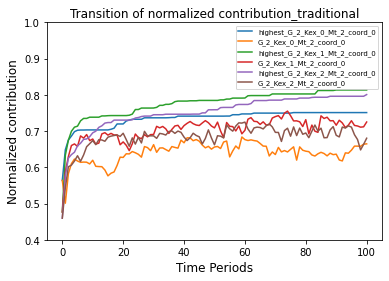

<Figure size 1200x900 with 0 Axes>

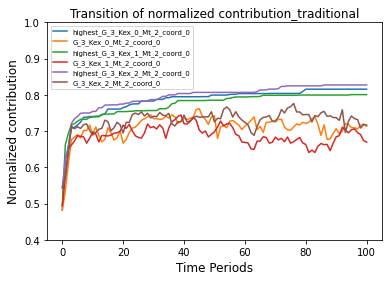

<Figure size 1200x900 with 0 Axes>

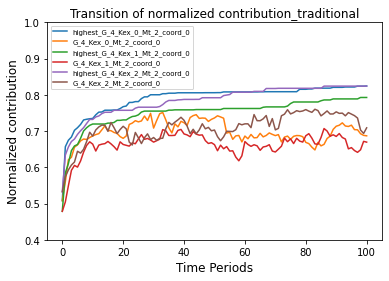

<Figure size 1200x900 with 0 Axes>

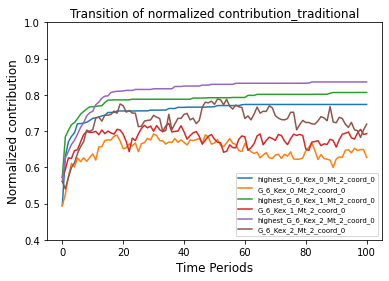

<Figure size 1200x900 with 0 Axes>

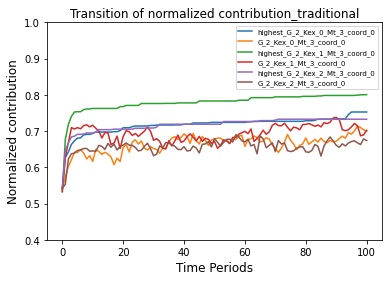

<Figure size 1200x900 with 0 Axes>

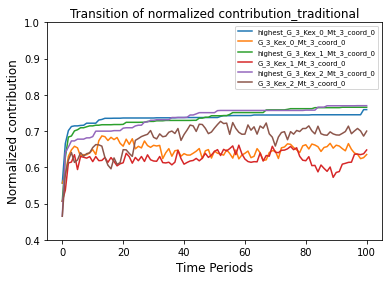

<Figure size 1200x900 with 0 Axes>

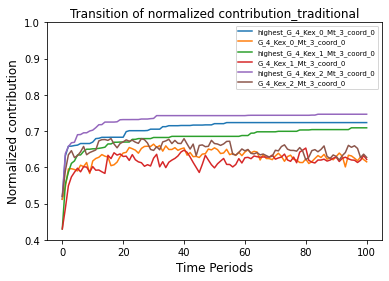

<Figure size 1200x900 with 0 Axes>

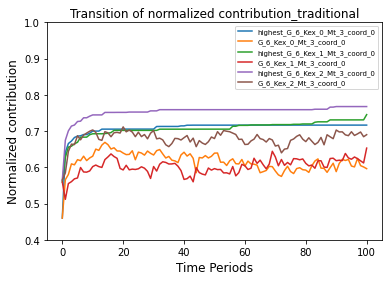

<Figure size 1200x900 with 0 Axes>

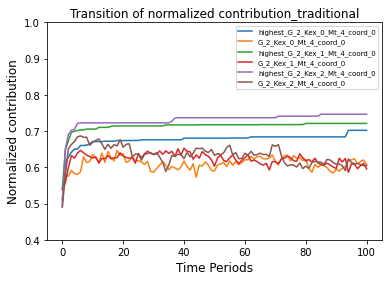

<Figure size 1200x900 with 0 Axes>

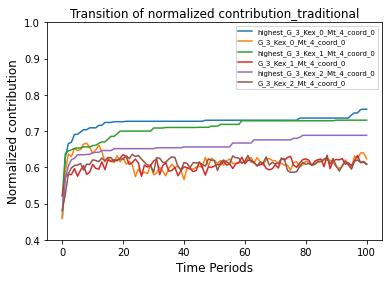

<Figure size 1200x900 with 0 Axes>

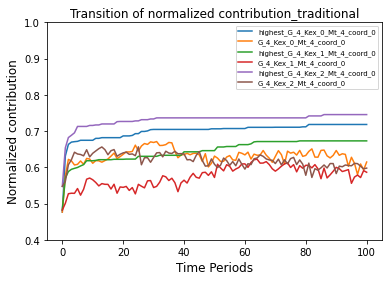

<Figure size 1200x900 with 0 Axes>

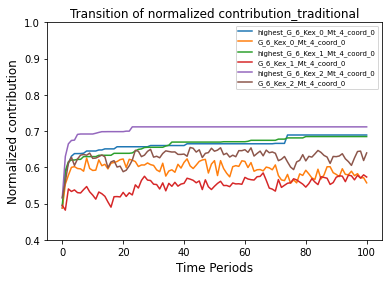

<Figure size 1200x900 with 0 Axes>

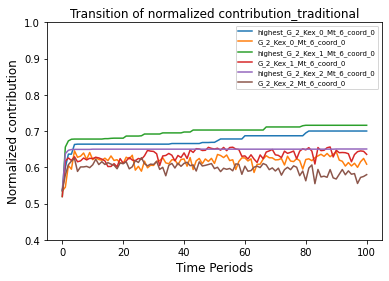

<Figure size 1200x900 with 0 Axes>

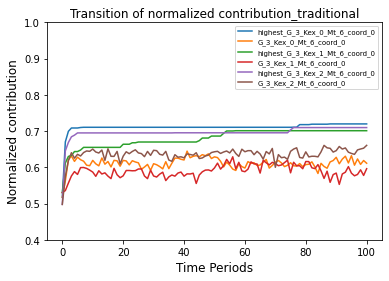

<Figure size 1200x900 with 0 Axes>

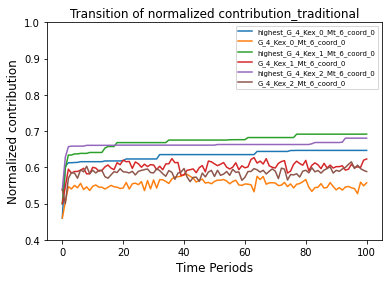

<Figure size 1200x900 with 0 Axes>

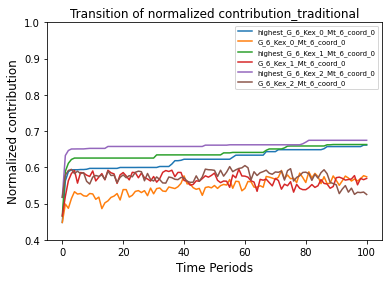

<Figure size 1200x900 with 0 Axes>

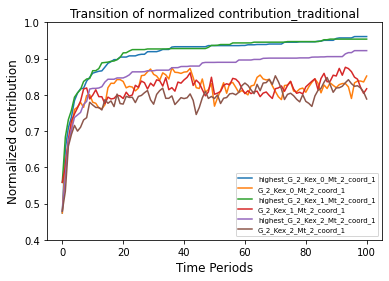

<Figure size 1200x900 with 0 Axes>

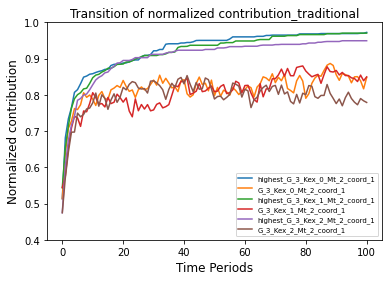

<Figure size 1200x900 with 0 Axes>

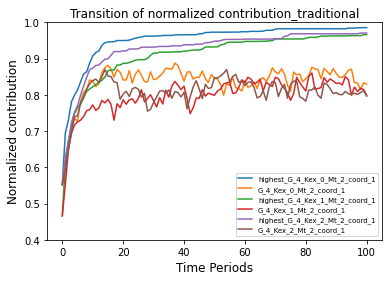

<Figure size 1200x900 with 0 Axes>

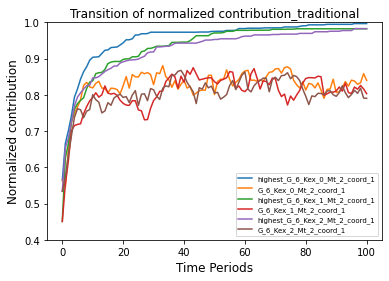

<Figure size 1200x900 with 0 Axes>

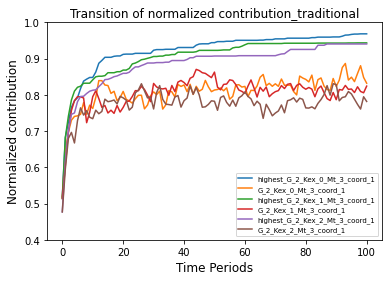

<Figure size 1200x900 with 0 Axes>

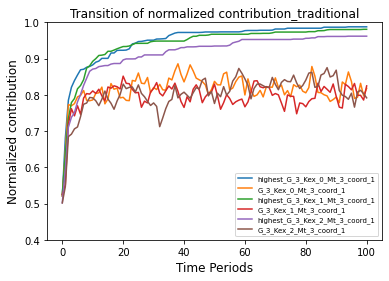

<Figure size 1200x900 with 0 Axes>

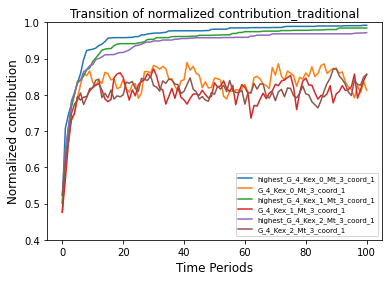

<Figure size 1200x900 with 0 Axes>

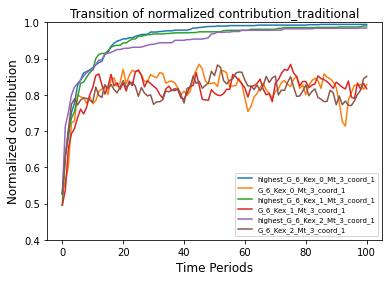

<Figure size 1200x900 with 0 Axes>

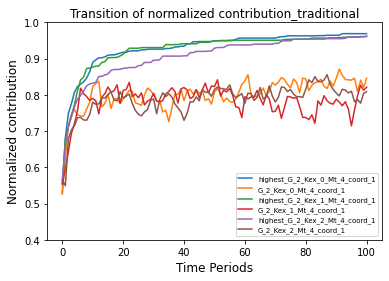

<Figure size 1200x900 with 0 Axes>

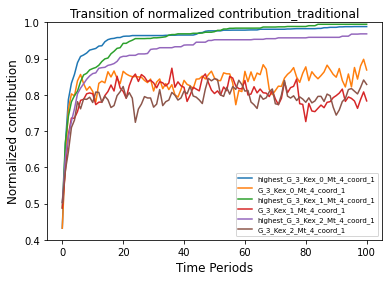

<Figure size 1200x900 with 0 Axes>

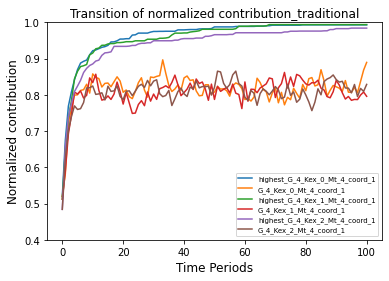

<Figure size 1200x900 with 0 Axes>

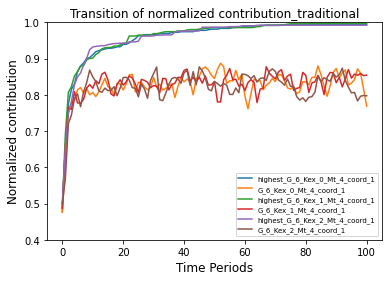

<Figure size 1200x900 with 0 Axes>

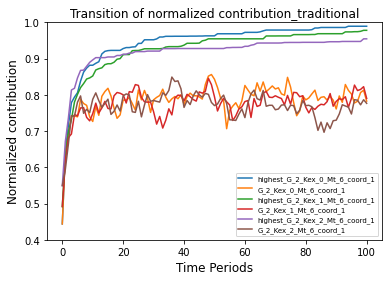

<Figure size 1200x900 with 0 Axes>

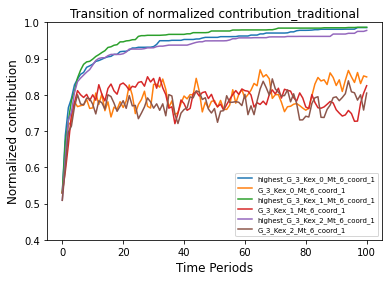

<Figure size 1200x900 with 0 Axes>

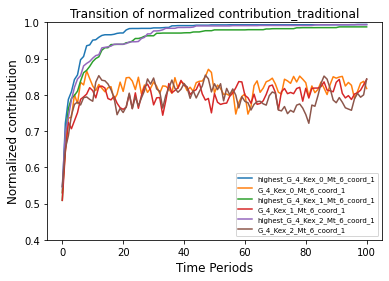

<Figure size 1200x900 with 0 Axes>

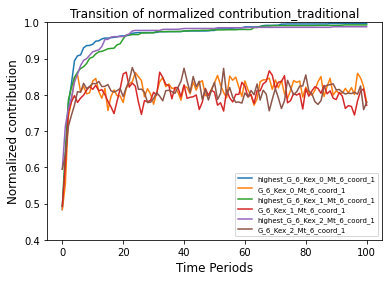

<Figure size 1200x900 with 0 Axes>

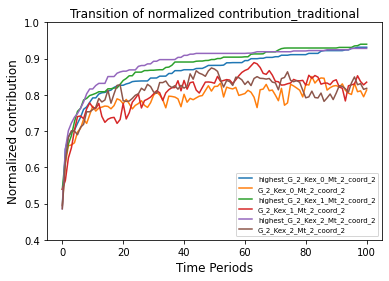

<Figure size 1200x900 with 0 Axes>

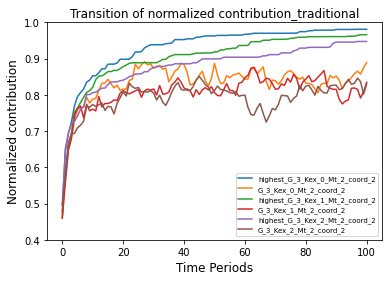

<Figure size 1200x900 with 0 Axes>

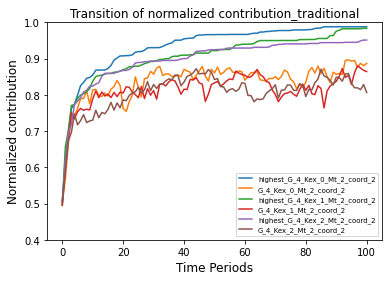

<Figure size 1200x900 with 0 Axes>

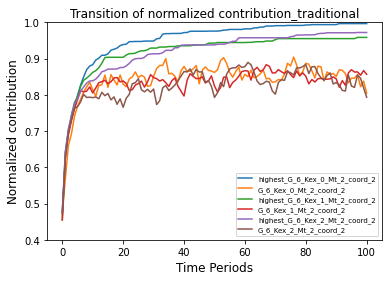

<Figure size 1200x900 with 0 Axes>

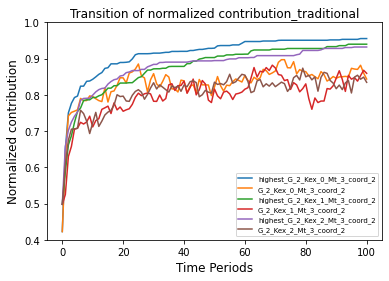

<Figure size 1200x900 with 0 Axes>

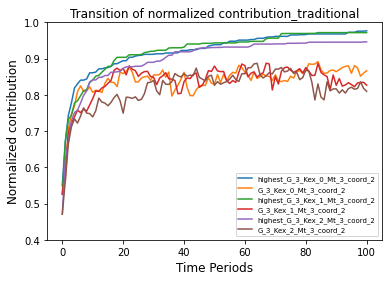

<Figure size 1200x900 with 0 Axes>

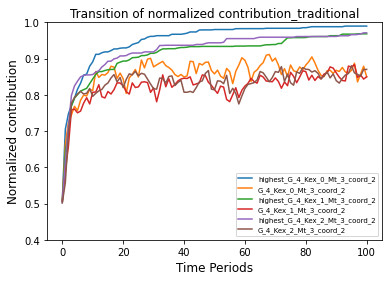

<Figure size 1200x900 with 0 Axes>

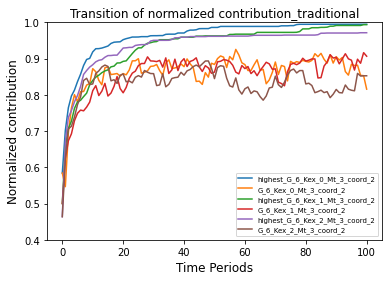

<Figure size 1200x900 with 0 Axes>

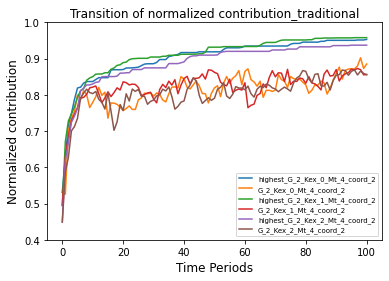

<Figure size 1200x900 with 0 Axes>

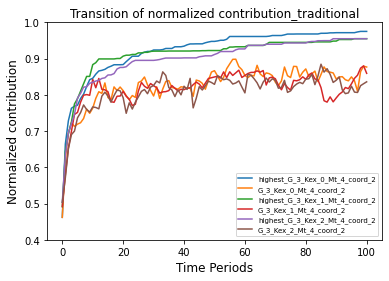

<Figure size 1200x900 with 0 Axes>

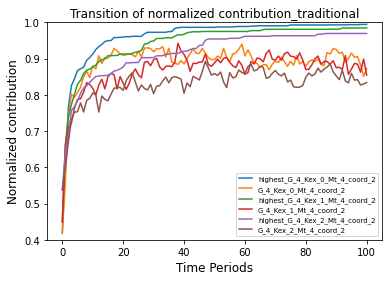

<Figure size 1200x900 with 0 Axes>

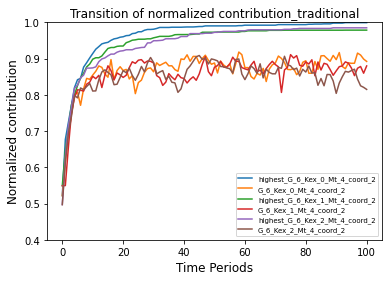

<Figure size 1200x900 with 0 Axes>

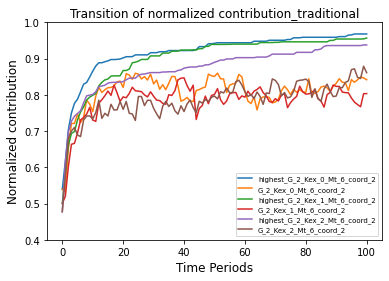

<Figure size 1200x900 with 0 Axes>

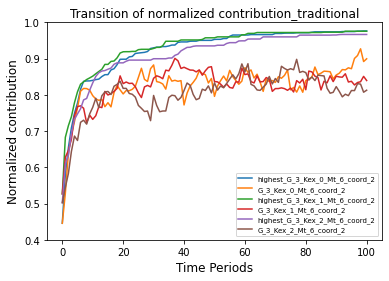

<Figure size 1200x900 with 0 Axes>

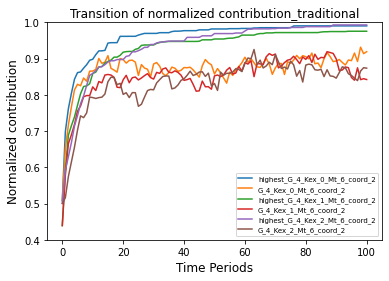

<Figure size 1200x900 with 0 Axes>

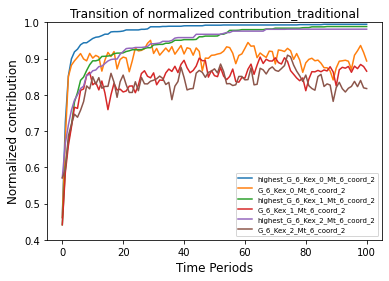

In [9]:
import numpy as np
from os.path import expanduser  # new
import matplotlib.pyplot as plt
import csv
from google.colab import drive
import os
import random
import pandas as pd

N = 12  #要素数
K = 3
i = 1000  # 期数
t = 100   #一期あたりの回数
coord = 1
file_specific = '_traditional' #ファイルにつける特異的な名前
file_name ='/content/drive/My Drive'
save_folder_name = '/NK_workshop/Graduation_ver_3/'

KG_matrix = \
  np.array([
            [2,5,6,7],
            [3,3,4,5],
            [4,2,3,4],
            [6,1,2,3]
            ])
  
Mt_arr = [2,3,4,6]
counter = 1  

for coord in range(3):

  for Mt in Mt_arr:

    for GG in [0,1,2,3]:

      plt.figure(facecolor='white', figsize=(8, 6), dpi=150)

      for KK in [1,2,3]:
        G = KG_matrix[GG,0]
        K = KG_matrix[GG,KK]
        Kex = K - int(N/G) +1

        print('G:'+ str(G))
        print('K:'+ str(K))
        print('Kex:'+ str(Kex)) 
        
        NK_landscape = np.load(file_name + '/NK_workshop/NK_land_type_1' + '_D_' + str(G) + '_K_' + str(K) + '_i_' + str(i) + '.npy')

        var_set = Var_set(N, K, Mt, coord) 
        environment = Environment(12, NK_landscape)
        agent = Agent(var_set, environment)
        for i1 in range(int(i/50)):
          for t1 in range(t):
            agent.local_search()

          high_str = str('highest_G_' + str(G) + '_Kex_' + str(Kex) +'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord))
          norm_str = str('G_' + str(G) + '_Kex_' + str(Kex) +'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord))
        
          if KK == 1 and i1 ==0:
            output_sum = pd.DataFrame(np.array(agent.rec_highest).reshape(len(agent.rec_highest),1),columns=[high_str])
            output_sum[norm_str] = agent.rec_norm
          elif i1 == 0:
            output_sum[high_str] = agent.rec_highest
            output_sum[norm_str] = agent.rec_norm
          else:
            output_sum[high_str] += agent.rec_highest
            output_sum[norm_str] += agent.rec_norm


          agent = Agent(var_set, environment)
          environment.step()

        output_ave = output_sum / int(i/50)
        print(output_ave)

        if counter == 1:
          result = output_ave
        else:
          result = result.join(output_ave, rsuffix='_a')  

        print(result)

        print(str(counter) + '周目が終わりました')
        counter += 1
      label_str = str('G='+str(G) +', K='+ str(K)+ ', Kex=' +str(Kex))
      output_ave.plot()
      plt.ylim(0.4,1)
      plt.title('Transition of normalized contribution'+file_specific, size=12)
      plt.xlabel('Time Periods', size=12)
      plt.ylabel('Normalized contribution', size=12)
      plt.legend(fontsize='x-small')
      if not os.path.exists(file_name + save_folder_name):
        os.makedirs(file_name + save_folder_name)
      plt.savefig(file_name + save_folder_name+ '_G_' + str(G) + '_K_' + str(K) + '_i_' + str(i)+'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord) +str(file_specific)+'.jpg', format='jpg')

result.to_csv(str(file_name + save_folder_name + file_specific + 'rec_result.csv'))

###実行（Mt選択版）

G:2
K:5
Kex:0
1周目が終わりました
G:2
K:6
Kex:1
2周目が終わりました
G:2
K:7
Kex:2
3周目が終わりました
G:3
K:3
Kex:0
4周目が終わりました
G:3
K:4
Kex:1
5周目が終わりました
G:3
K:5
Kex:2
6周目が終わりました
G:4
K:2
Kex:0
7周目が終わりました
G:4
K:3
Kex:1
8周目が終わりました
G:4
K:4
Kex:2
9周目が終わりました
G:6
K:1
Kex:0
10周目が終わりました
G:6
K:2
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


11周目が終わりました
G:6
K:3
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


12周目が終わりました
G:2
K:5
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


13周目が終わりました
G:2
K:6
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


14周目が終わりました
G:2
K:7
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


15周目が終わりました
G:3
K:3
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


16周目が終わりました
G:3
K:4
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


17周目が終わりました
G:3
K:5
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


18周目が終わりました
G:4
K:2
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


19周目が終わりました
G:4
K:3
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


20周目が終わりました
G:4
K:4
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


21周目が終わりました
G:6
K:1
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


22周目が終わりました
G:6
K:2
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


23周目が終わりました
G:6
K:3
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


24周目が終わりました
G:2
K:5
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


25周目が終わりました
G:2
K:6
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


26周目が終わりました
G:2
K:7
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


27周目が終わりました
G:3
K:3
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


28周目が終わりました
G:3
K:4
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


29周目が終わりました
G:3
K:5
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


30周目が終わりました
G:4
K:2
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


31周目が終わりました
G:4
K:3
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


32周目が終わりました
G:4
K:4
Kex:2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


33周目が終わりました
G:6
K:1
Kex:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


34周目が終わりました
G:6
K:2
Kex:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


35周目が終わりました
G:6
K:3
Kex:2
36周目が終わりました


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

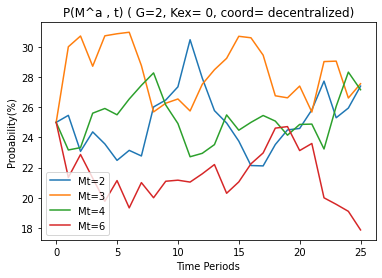

<Figure size 432x288 with 0 Axes>

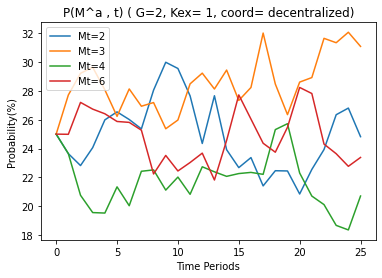

<Figure size 432x288 with 0 Axes>

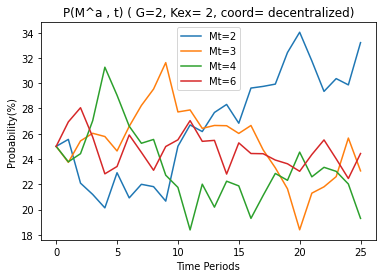

<Figure size 432x288 with 0 Axes>

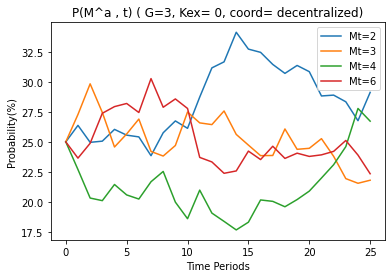

<Figure size 432x288 with 0 Axes>

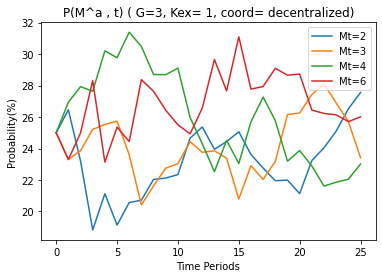

<Figure size 432x288 with 0 Axes>

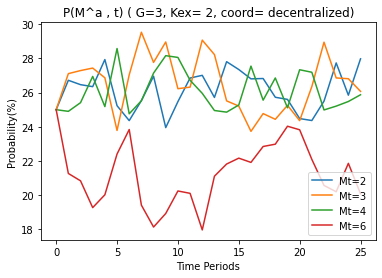

<Figure size 432x288 with 0 Axes>

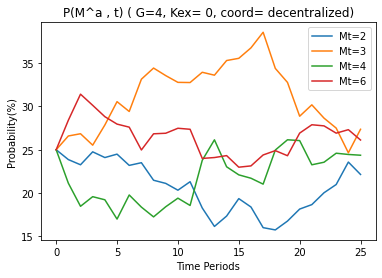

<Figure size 432x288 with 0 Axes>

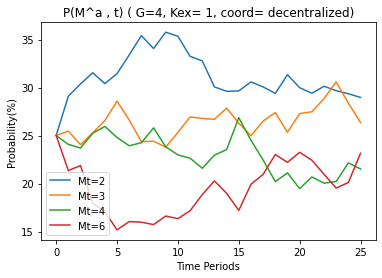

<Figure size 432x288 with 0 Axes>

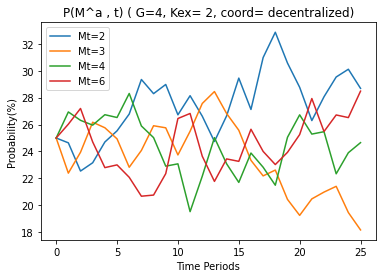

<Figure size 432x288 with 0 Axes>

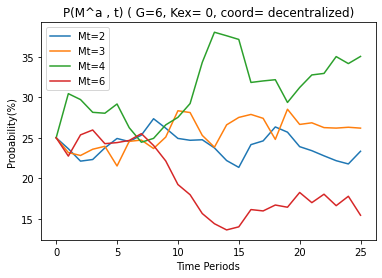

<Figure size 432x288 with 0 Axes>

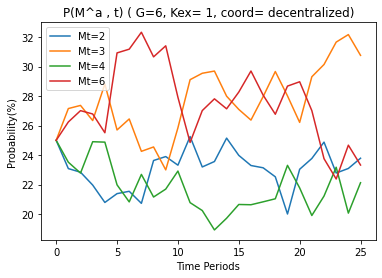

<Figure size 432x288 with 0 Axes>

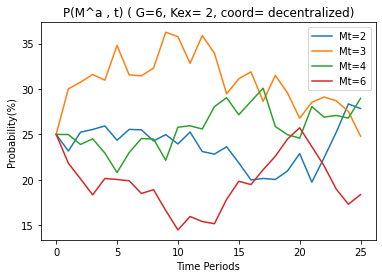

<Figure size 432x288 with 0 Axes>

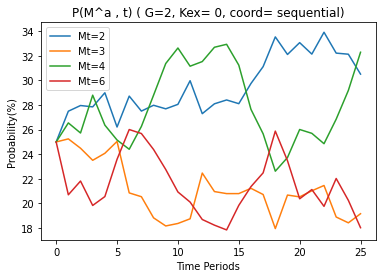

<Figure size 432x288 with 0 Axes>

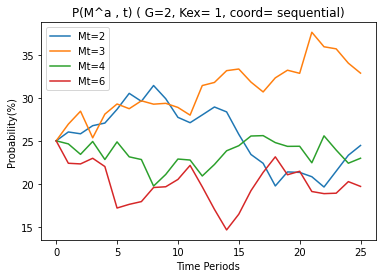

<Figure size 432x288 with 0 Axes>

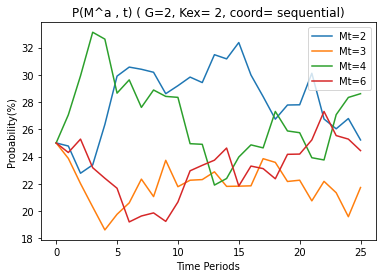

<Figure size 432x288 with 0 Axes>

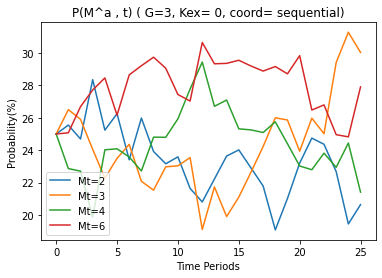

<Figure size 432x288 with 0 Axes>

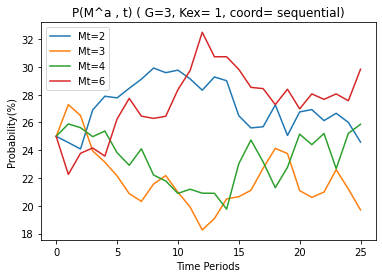

<Figure size 432x288 with 0 Axes>

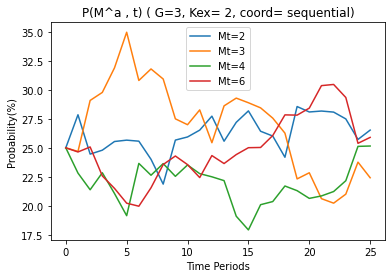

<Figure size 432x288 with 0 Axes>

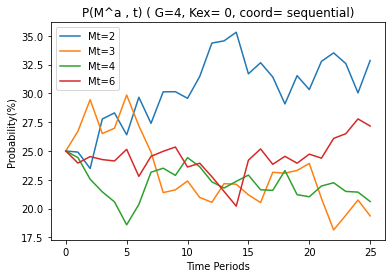

<Figure size 432x288 with 0 Axes>

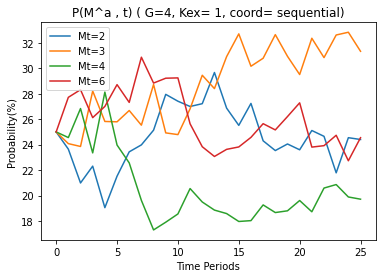

<Figure size 432x288 with 0 Axes>

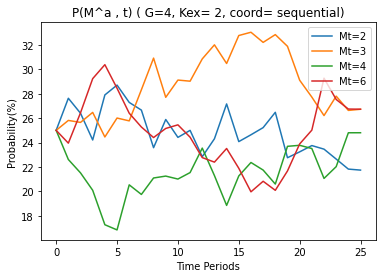

<Figure size 432x288 with 0 Axes>

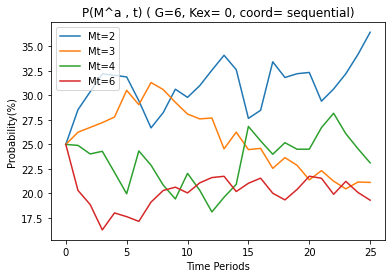

<Figure size 432x288 with 0 Axes>

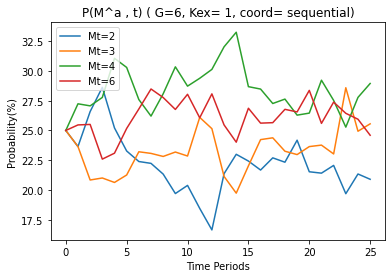

<Figure size 432x288 with 0 Axes>

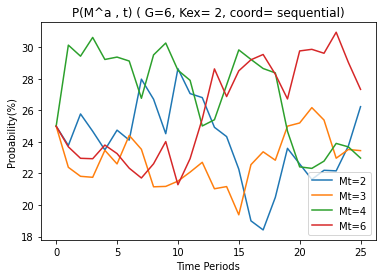

<Figure size 432x288 with 0 Axes>

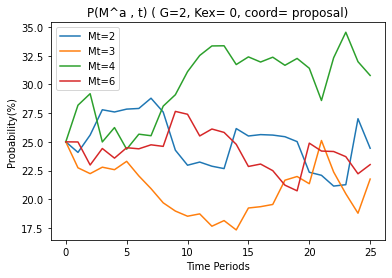

<Figure size 432x288 with 0 Axes>

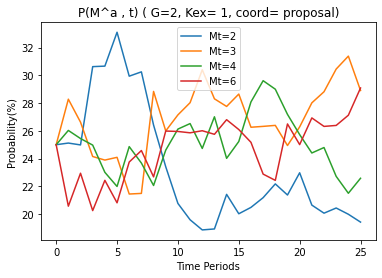

<Figure size 432x288 with 0 Axes>

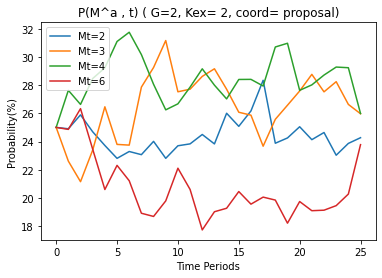

<Figure size 432x288 with 0 Axes>

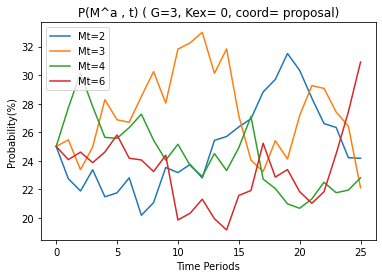

<Figure size 432x288 with 0 Axes>

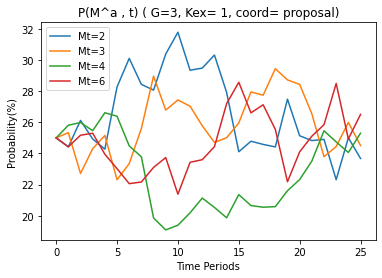

<Figure size 432x288 with 0 Axes>

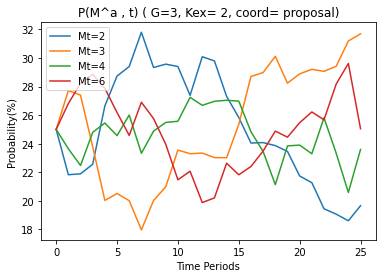

<Figure size 432x288 with 0 Axes>

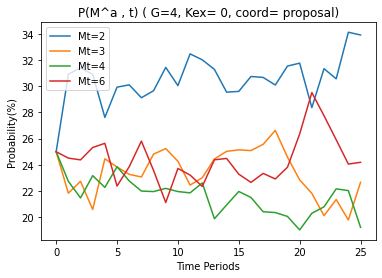

<Figure size 432x288 with 0 Axes>

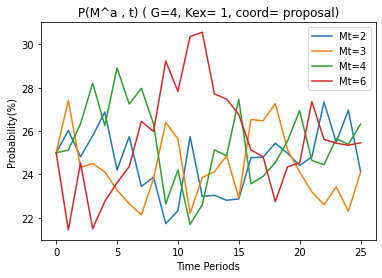

<Figure size 432x288 with 0 Axes>

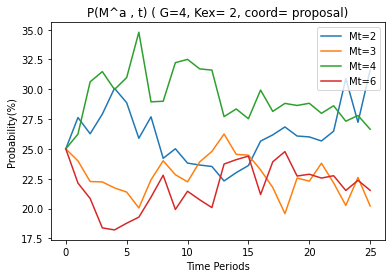

<Figure size 432x288 with 0 Axes>

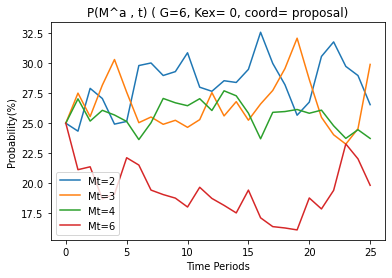

<Figure size 432x288 with 0 Axes>

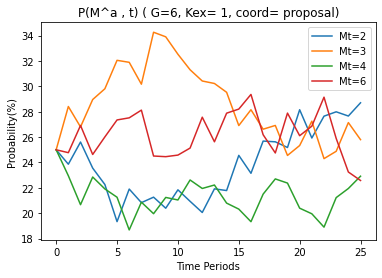

<Figure size 432x288 with 0 Axes>

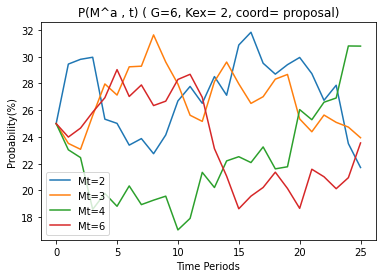

In [ ]:
import matplotlib.pyplot as plt
import os


N = 12  #要素数
K = 2
G = 4
Mt = 3
I = 1000  # 期数
T = 500  #一期あたりの回数
coord = 1
i = int(I/33)


file_specific = '_final_ver_5_' #ファイルにつける特異的な名前
file_name ='/content/drive/My Drive'
save_folder_name = '/NK_workshop/Graduation_ver/'

KG_matrix = \
  np.array([
            [2,5,6,7],
            [3,3,4,5],
            [4,2,3,4],
            [6,1,2,3]
            ])
  
counter = 1  

for coord in [0,1,2]:

  for GG in [0,1,2,3]:

    for KK in [1,2,3]:

      G = KG_matrix[GG,0]
      K = KG_matrix[GG,KK]
      Kex = K - int(N/G) +1

      print('G:'+ str(G))
      print('K:'+ str(K))
      print('Kex:'+ str(Kex)) 
      NK_landscape = np.load(file_name + '/NK_workshop/NK_land_type_1' + '_D_' + str(G) + '_K_' + str(K) + '_i_' + str(I) + '.npy')


      var_set = Var_set(N, K, Mt, coord, T_star=20, sigma_head=0.01, sigma_r=0.02) 
      environment = Environment(12, NK_landscape)
      agent = Agent(var_set, environment)
      manager = Manager(var_set,agent)

      for i1 in range(int(i)):
        for t1 in range(T):
          for adjust_key in range(var_set.Mt):
            agent.local_search()
          if t1 % var_set.T_star == 0 :
            if t1 == 0 and i1 == 0:
              rec_result = pd.DataFrame([var_set.Mt,0,0,0,0], index=['Mt','Norm_Mt_2','Norm_Mt_3','Norm_Mt_4','Norm_Mt_6'])
            else:
              if var_set.Mt == 2:
                len_rec_norm = len(agent.rec_norm)
                rec_result[len(rec_result.columns)] = [var_set.Mt, agent.highest_norm,0,0,0]
              elif var_set.Mt == 3:
                len_rec_norm = len(agent.rec_norm)
                rec_result[len(rec_result.columns)] = [var_set.Mt, 0, agent.highest_norm,0,0]
              elif var_set.Mt == 4:
                len_rec_norm = len(agent.rec_norm)
                rec_result[len(rec_result.columns)] = [var_set.Mt, 0,0, agent.highest_norm,0]
              elif var_set.Mt == 6:
                len_rec_norm = len(agent.rec_norm)
                rec_result[len(rec_result.columns)] = [var_set.Mt, 0,0,0, agent.highest_norm]  
            manager.select_Mt()
          # print('time_step_t:' + str(t1))
          # print('rec_prob_feasibles:')
          # print(manager.rec_prob_feasibles)
        environment.step()

        if i1 == 0:
          ave_prob_feasibles = manager.rec_prob_feasibles

        else:
          ave_prob_feasibles = ave_prob_feasibles + manager.rec_prob_feasibles

        # print('ave_prob_feasibles\n' + str(ave_prob_feasibles))

        manager.reset()




      ave_prob_feasibles = ave_prob_feasibles / int(i)
      ave_prob_feasibles = ave_prob_feasibles *100
      plt.figure(facecolor = 'White', tight_layout = True)
      ave_prob_feasibles.plot()
      if coord == 0:
        coord_str = 'decentralized'
      elif coord == 1:
        coord_str = 'sequential'
      elif coord == 2:
        coord_str = 'proposal'
      plt.title('P(M^a , t) ( G=' + str(G) + ', Kex= '+ str(Kex) + ', coord= ' + str(coord_str) + ')')
      plt.xlabel('Time Periods')
      plt.ylabel('Probability(%)')
      plt.legend(loc= 'best')
      rec_result
      # rec_norm = agent.rec_norm
      # sum = 0
      # rec = []
      # counter_1 = 0
      # for t2 in rec_norm:
      #   counter_1 += 1
      #   sum += t2
      #   if counter_1 % 20 == 0:
      #     rec.append(sum / 20)
      #     sum = 0
      if not os.path.exists(file_name + save_folder_name):
        os.makedirs(file_name + save_folder_name)
      rec_result.to_csv(str(file_name + save_folder_name+ 'rec_result_G_' + str(G) + '_K_' + str(K) + '_i_' + str(i)+ '_coord_' + str(var_set.coord) +str(file_specific)+'.csv'))
      ave_prob_feasibles.to_csv(str(file_name + save_folder_name+ 'rec_prob_feasibles_G_' + str(G) + '_K_' + str(K) + '_i_' + str(i)+ '_coord_' + str(var_set.coord) +str(file_specific)+'.csv'))
      plt.savefig(file_name + save_folder_name+ '_G_' + str(G) + '_K_' + str(K) + '_i_' + str(i)+ '_coord_' + str(var_set.coord) +str(file_specific)+'.jpg', format='jpg')
      print(str(counter) +  '周目が終わりました')
      counter += 1

      



  
